# **谋定而后动，知止而有得**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import rqdatac as rq
rq.init()

In [3]:
days_off = 0 if dt.datetime.now().hour > 20 else 1
yesterday = (dt.date.today() - pd.DateOffset(days=days_off)).strftime("%Y%m%d")
start_date = "20230101"

In [4]:
si_data = rq.futures.get_dominant_price("SI", start_date=start_date, end_date=yesterday, frequency="1m").loc["SI"]
si_daily = si_data.groupby("trading_date")["close"].last()
si_daily_return = si_daily.diff() / si_daily.shift()
si_daily_return

trading_date
2023-01-03         NaN
2023-01-04   -0.005740
2023-01-05   -0.002442
2023-01-06    0.010461
2023-01-09   -0.005507
                ...   
2025-09-11    0.008656
2025-09-12    0.000572
2025-09-15    0.006289
2025-09-16    0.013068
2025-09-17    0.005609
Name: close, Length: 658, dtype: float64

In [5]:
si_intraday_std = si_data.groupby("trading_date")["close"].std()
si_intraday_std.describe()

count    658.000000
mean      51.209169
std       33.920752
min        8.805831
25%       28.308450
50%       42.100916
75%       59.653359
max      245.979023
Name: close, dtype: float64

In [6]:
def get_daily_return(underlying: str):
    data = rq.futures.get_dominant_price(underlying, start_date=start_date, end_date=yesterday, frequency="1m").loc[underlying]
    daily = data.groupby("trading_date")["close"].last()
    daily_return = (daily.diff() / daily.shift()).dropna()
    daily_return.name = underlying
    return daily_return

In [7]:
underlying_list = ["SI", "FG", "SA", "RB", "JM", "LC", "V", "M", "HC", "TA", "AO"]

all_data = pd.DataFrame()
for underlying in underlying_list:
    data = get_daily_return(underlying)
    all_data = pd.concat([all_data, data], axis=1)

all_data

,SI,FG,SA,RB,JM,LC,V,M,HC,TA,AO
2023-01-04 00:00:00,-0.005740,-0.005698,0.002401,-0.008210,-0.030491,NaN,-0.011595,-0.025413,-0.004723,-0.016943,NaN
2023-01-05 00:00:00,-0.002442,0.004011,0.002395,-0.002299,0.011689,NaN,-0.002865,-0.011852,-0.001748,-0.026602,NaN
2023-01-06 00:00:00,0.010461,0.013128,0.025090,0.020742,0.017607,NaN,0.023119,-0.011652,0.023267,0.005774,NaN
2023-01-09 00:00:00,-0.005507,-0.008451,-0.015152,-0.003161,0.018654,NaN,-0.002674,0.007628,-0.004890,-0.007271,NaN
2023-01-10 00:00:00,-0.009745,-0.013068,-0.005917,0.007022,-0.007696,NaN,0.000268,-0.012732,0.004914,0.004241,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-11 00:00:00,0.008656,0.003387,0.004684,-0.005468,0.021934,0.003959,0.006383,0.007175,-0.002394,-0.002129,0.004091
2025-09-12 00:00:00,0.000572,-0.004219,0.002331,0.011320,0.002628,0.002254,-0.002455,-0.002915,0.008998,-0.008532,-0.010526
2025-09-15 00:00:00,0.006289,0.022881,0.013953,0.002878,0.037571,0.021360,0.009229,-0.012017,0.001784,0.005164,0.007207
2025-09-16 00:00:00,0.013068,0.024855,0.023700,0.009566,0.044632,0.006879,0.007925,-0.000329,0.009496,0.003425,0.014991


In [8]:
all_data.corr()

,SI,FG,SA,RB,JM,LC,V,M,HC,TA,AO
SI,1.000000,0.367746,0.355813,0.374944,0.415944,0.325744,0.479295,0.081507,0.368670,0.239022,0.296558
FG,0.367746,1.000000,0.579392,0.480629,0.510169,0.331984,0.509396,0.109746,0.467437,0.274949,0.324528
SA,0.355813,0.579392,1.000000,0.486802,0.485824,0.231270,0.462513,0.138234,0.485164,0.292154,0.264347
RB,0.374944,0.480629,0.486802,1.000000,0.690750,0.303558,0.606898,0.130497,0.956047,0.371876,0.321443
JM,0.415944,0.510169,0.485824,0.690750,1.000000,0.289122,0.577761,0.100704,0.678923,0.338313,0.338859
LC,0.325744,0.331984,0.231270,0.303558,0.289122,1.000000,0.382079,0.119023,0.336415,0.179911,0.202748
V,0.479295,0.509396,0.462513,0.606898,0.577761,0.382079,1.000000,0.137011,0.612547,0.469508,0.346530
M,0.081507,0.109746,0.138234,0.130497,0.100704,0.119023,0.137011,1.000000,0.123672,0.079237,0.007073
HC,0.368670,0.467437,0.485164,0.956047,0.678923,0.336415,0.612547,0.123672,1.000000,0.393628,0.307083
TA,0.239022,0.274949,0.292154,0.371876,0.338313,0.179911,0.469508,0.079237,0.393628,1.000000,0.181046


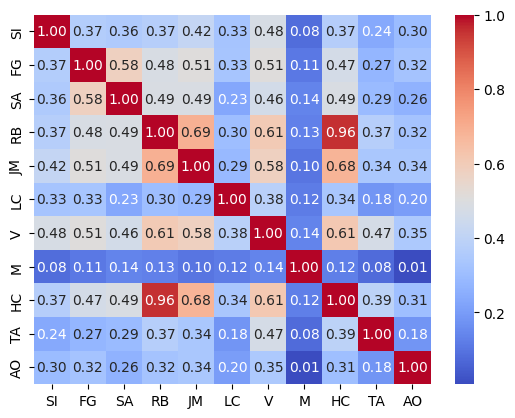

In [9]:
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

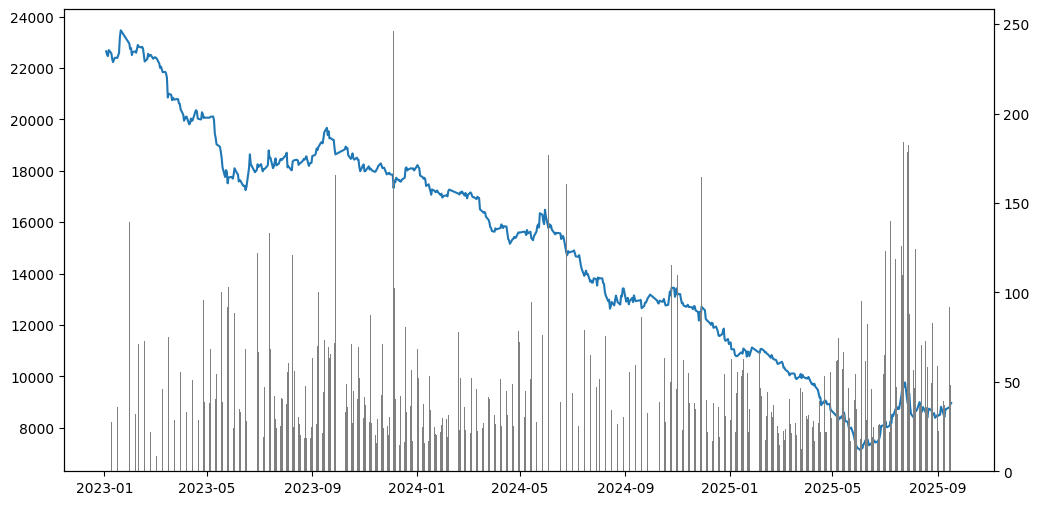

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(si_data.groupby("trading_date")["close"].last())
ax2 = ax1.twinx()
ax2.bar(si_data.groupby("trading_date")["close"].last().index, si_data.groupby("trading_date")["close"].std(), color="grey", width=0.5)
plt.show()

In [12]:
def plot(underlying: str, date: str, save_path: str=None):

    data = rq.futures.get_dominant_price(underlying, start_date=date, end_date=date, frequency="1m")
    data = data.loc[underlying][["open", "high", "low", "close", "volume"]]
    data["vwap"] = (data["close"] * data["volume"]).cumsum() / data["volume"].cumsum()
    data = data.asfreq("1min")

    _, ax1 = plt.subplots(figsize=(12, 6))

    t1 = "-10:15:00"                   # 09:00 ~ 10:15
    t2 = "-10:30:00"; t3 = "-11:30:00" # 10:30 ~ 11:30
    t4 = "-13:30:00"                   # 13:30 ~ 15:00

    x1 = pd.to_datetime(date + t1)
    x2 = pd.to_datetime(date + t2)
    x3 = pd.to_datetime(date + t3)
    x4 = pd.to_datetime(date + t4)

    ymin = data["close"].min() - 20
    ymax = data["close"].max() + 20

    ax1.plot(data["close"])
    ax1.plot(data["vwap"])
    ax1.plot(data["vwap"] + 25, linewidth=0.5, linestyle="--")
    ax1.plot(data["vwap"] - 25, linewidth=0.5, linestyle="--")
    ax1.vlines([x1, x2, x3, x4], ymax=ymax, ymin=ymin, colors="grey", linestyles="--")

    ax2 = ax1.twinx()
    ax2.bar(data.index, data["volume"], color="grey", width=1e-4)

    ax1.xaxis.set_major_formatter(mdt.DateFormatter("%H:%M"))

    date_ = date[0: 4] + '-' + date[4: 6] + '-' + date[6: 8]

    # fig.autofmt_xdate()
    # fig.tight_layout()
    plt.title("%s (μ: %.2f, σ: %.2f)" % (date_, data["close"].mean(), data["close"].std()))
    if save_path is not None:
        plt.savefig("%s%s.png" % (save_path, date_))
    print("%s finished." % date_)

2025-09-10 finished.


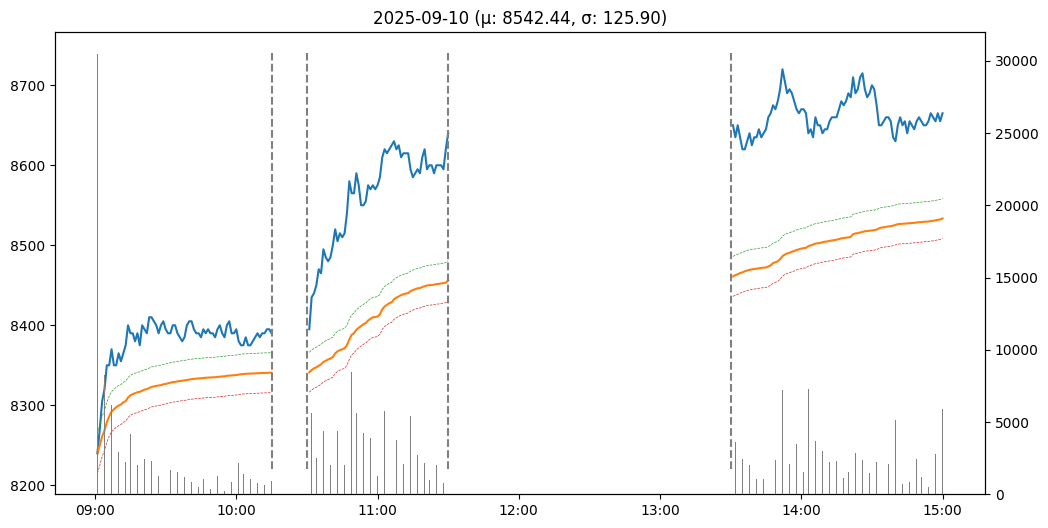

In [23]:
"""
date_list = list(map(lambda x: x.strftime("%Y%m%d"), rq.get_trading_dates(start_date="20230101", end_date="20250912")))

for date in date_list:
    plot(date)
"""

plot("SI", "20250910")